In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast

movies_df = pd.read_csv(r'C:\Users\E1460340\Downloads\movies_metadata.csv', low_memory= False)

movies_df['release_date'] = pd.to_datetime(movies_df['release_date'],errors='coerce') # Convert data type of release_date to datetime.
movies_df['budget'] = pd.to_numeric(movies_df['budget'], errors='coerce') # Convert data type of budget to numeric.

def list_name(string_list_dict): # Convert the string list of dictionary into list of name.
    list_dict = ast.literal_eval(string_list_dict) if pd.notna(string_list_dict) else string_list_dict
    return [dict['name'] for dict in list_dict] if isinstance(list_dict,list) else []

movies_df['genres'] = movies_df['genres'].apply(lambda x: list_name(x))
movies_df['production_companies'] = movies_df['production_companies'].apply(lambda x: list_name(x))
movies_df['production_countries'] = movies_df['production_countries'].apply(lambda x: list_name(x))

# How does budget relate to box office revenue?

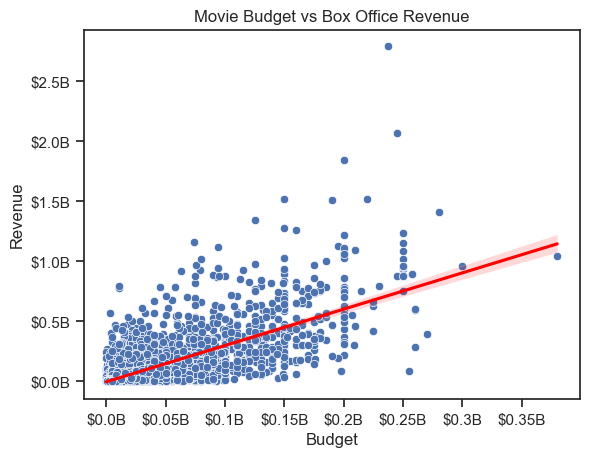

In [41]:
movies_budget_revenue = movies_df[(movies_df['budget'] > 0) & (movies_df['revenue'] > 0)][['budget','revenue']]

sns.set_theme(style= 'ticks')
sns.scatterplot(
    data= movies_budget_revenue
    ,x= 'budget'
    ,y= 'revenue'
    )

sns.regplot(
    data= movies_budget_revenue
    ,x= 'budget'
    ,y= 'revenue'
    ,scatter= False
    ,color= 'red'
    ,
    )

ax= plt.gca()
ax.set_title('Movie Budget vs Box Office Revenue')
ax.set_xlabel('Budget')
ax.set_ylabel('Revenue')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, i: f'${y/1_000_000_000}B'))
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, i: f'${x/1_000_000_000}B'))

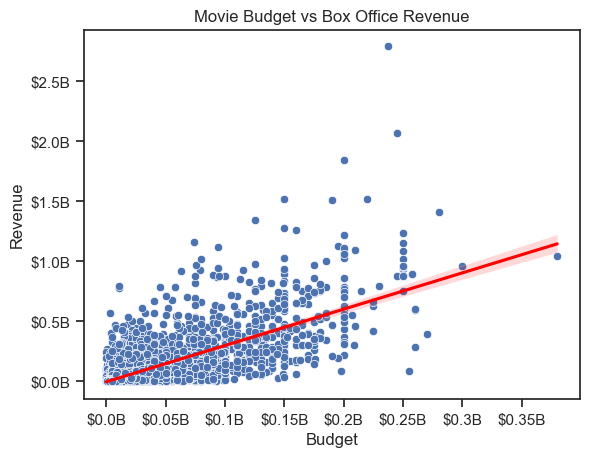

In [ ]:
movies_budget_revenue = movies_df[(movies_df['budget'] > 0) & (movies_df['revenue'] > 0)][['budget','revenue']]

sns.set_theme(style= 'ticks')
sns.scatterplot(
    data= movies_budget_revenue
    ,x= 'budget'
    ,y= 'revenue'
    )

sns.regplot(
    data= movies_budget_revenue
    ,x= 'budget'
    ,y= 'revenue'
    ,scatter= False
    ,color= 'red'
    ,
    )

ax= plt.gca()
ax.set_title('Movie Budget vs Box Office Revenue')
ax.set_xlabel('Budget')
ax.set_ylabel('Revenue')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, i: f'${y/1_000_000_000}B'))
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, i: f'${x/1_000_000_000}B'))